# Project Scenario: Real Estate Market in King County



![](IMG_4342.JPG)



You are a Data Analyst working for a Real Estate Investment Trust. You are tasked with determining the market price of residential properties in Seattle given a set of features/attributes (e.g. squate footage, number of bedrooms, number of floors, etc.). 

In [1]:
#Supress warning signs:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn=warn

In [2]:
import pandas as pd
import matplotlib #matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
import matplotlib.pyplot as plt #pyplot is a collection of functions that make matplotlib work like MATLAB.
import sklearn #sklearn is a machine learning library for the Python programming language.
from sklearn.pipeline import Pipeline #Pipeline is a class in sklearn that chains multiple estimators into one.
from sklearn.preprocessing import StandardScaler #StandardScaler is a class in sklearn that standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import PolynomialFeatures #PolynomialFeatures is a class in sklearn that generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
from sklearn.linear_model import LinearRegression  #LinearRegression is a class in sklearn that fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.`
import numpy as np 
import seaborn as sns 

#%matplotlib inline is a magic function in IPython. Is a directive to IPython that you want your Matplotlib plots to be included directly in your notebook
%matplotlib inline 

In [3]:
#Use the Pandas method read_csv() to load the data set
df=pd.read_csv('kc_house.csv')
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#### Question 1: 
Display the data types of each column using the fucntion dtypes


In [4]:
#Display the data types of each column using the fucntion dtypes
df.dtypes


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
#Using the describe method to obtain a statistical summary of the dataframe
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Module 2: Data Wrangling
#### Question 2

Drop the columns "id" and "unnnamed: 0" from axis 1 using the method drop(), then use the the methid 'decribe()' to obtain a statistical summary of the data.

In [6]:
#Drop the columns "id" and "unnnamed: 0" from axis 1 using the method drop(), then use the the methid 'decribe()' to obtain a statistical summary of the data.
df.drop(['id','Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#Using descriptive statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#We can see the sum of the missing values from the columns 'bedrooms' and 'bathrooms' 
print("number of NaN values for the column bedrooms:",df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms:",df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms: 13
number of NaN values for the column bathrooms: 10


In [9]:
'''We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms' using the method replace().'''
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [10]:
'''We also replace the missing values of the column 'bathrooms'
 with the mean of the column 'bathrooms'  using the method replace().
 Don't forget to set the  inplace  parameter top  True '''
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [11]:
#Recheck if there are any missing values in the columns 'bedrooms' and 'bathrooms'
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


### Module 3: Exploratory Data Analysis

#### Question 3

In [12]:
'''Use the method value_counts to count the number of 
houses with unique floor values, use the method .to_fra() to 
convertit to a dataframe'''



'Use the method value_counts to count the number of \nhouses with unique floor values, use the method .to_fra() to \nconvertit to a dataframe'

In [21]:
#Use the method value_counts to count the number of houses with unique floor values, use the method .to_fra() to convertit to a dataframe
#and assign it to the variable floor_counts.
floor_counts=df['floors'].value_counts().to_frame()
floor_counts.rename(columns={'floors':'value_counts'},inplace=True)
floor_counts.index.name='floors'
floor_counts


,value_counts
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


#### Question 4

Text(0.5, 1.0, 'House Price vs. Waterfront View')

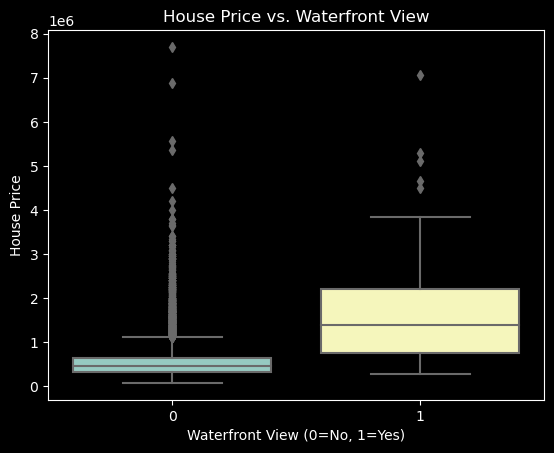

In [26]:
#Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.
plt.style.use("dark_background")

#Creating the plot
boxplot_waterfront = sns.boxplot(x='waterfront', y='price', data=df)

#Setting the labels and title
plt.xlabel("Waterfront View (0=No, 1=Yes)")
plt.ylabel("House Price")
plt.title("House Price vs. Waterfront View")


#### Question 5

Text(0.5, 1.0, 'Relationship between House Price and Square Footage Above Ground Level')

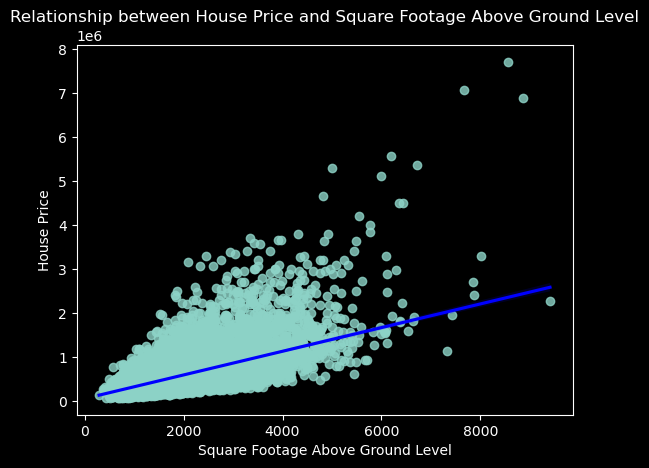

In [38]:
#Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

# Set the theme to dark
plt.style.use("dark_background")

#Setting the theme of the plot
sns.regplot(x="sqft_above",y="price",data=df, line_kws={"color":"b"})

# Set the labels and title
plt.xlabel("Square Footage Above Ground Level")
plt.ylabel("House Price")
plt.title("Relationship between House Price and Square Footage Above Ground Level")


In [49]:
#Mathematical modeling of home prices vs. square footage above ground level of home

#Institate the linear regression model
model=LinearRegression()
#Fit the model to the data
model.fit(df['sqft_above'].values.reshape(-1,1),df['price'])

#Get the slope (m) and intercept (b) of the linear regression lineL
m=model.coef_[0]
b=model.intercept_

print("m=",m,"\nb=",b)
print("f(x)= ",m,"x + ",b)


m= 268.4731877618893 
b= 59953.192047000804
f(x)=  268.4731877618893 x +  59953.192047000804


The regression line suggests a positive correlation between the square footage above ground level ('sqft_above') attribute and house prices. 

The Law of the Interpenetration of Opposites is at play here since two oppossing forces:
 * investment/cost, manifesting through high sqaure footage. 
 * Drive for profits, manifesting in high house prices.

Which oppose and cooperate forward in the investment decisions of real-estate profiteers, developers, and buyers. 

The relationship between home price and above square footage can be modeled by the following function:

_f(x)=268.47x+59953.19_

<mark>Assuming all other factors remain constant, this function means that the house price in King County increases by approximately $268.47 per each additional square foot of space above the ground level</mark>













In [61]:
'''We can use the Pandas method corr() to find the features
that is most correlated with price.'''

#Calculate correlation coefficient and sort them in descending order

corr_df=df.corr()['price'].sort_values(ascending=False)

#Covert series to dataframe and reset index
corr_df=corr_df.to_frame().reset_index()

# Add a 'feature' header above the fist column and a 'correlation coefficient' header above the second column
corr_df.columns=['Features','Correlation Coefficient']

#Get rid of the the price row
corr_df.drop(0,axis=0,inplace=True)

corr_df


,Features,Correlation Coefficient
1,sqft_living,0.702035
2,grade,0.667434
3,sqft_above,0.605567
4,sqft_living15,0.585379
5,bathrooms,0.525738
6,view,0.397293
7,sqft_basement,0.323816
8,bedrooms,0.308797
9,lat,0.307003
10,waterfront,0.266369


### Moule 4: Model Development

In [65]:
#Fit the linear regression model using the longitude feature 'long' and calcualte the R^2 value for the model

X=df[['long']] #create a dataframe with the feature 'long'
Y=df['price'] #create a dataframe with the target variable 'price'
lm=LinearRegression() #create a linear regression object
lm.fit(X,Y) #train the model
lm.score(X,Y) #calculate the R^2 value

0.00046769430149007363

Since R^2=0.0005 (close to zeo),we can say that the longitude feature explains very little of the variance in the price variable in our linear regression model. That is, longitude on its own is not a good predictor of house prices according to this model. 

#### Question 6

In [66]:
#Fit the linear regression model using the 'price' using the feature 'sqft_living', then calcuate the R^2
X=df[['sqft_living']]
Y=df['price']
lm=LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

R^2=49.29% suggests that the variability in the house prices can be explained by the square footage of the home (independent varaible 'sqft_living'). In other words, the squre footage of the living space accounts for nearly half of the ovserved varaition in house prices. 

#### Question 7

In [70]:
#Fit the linear regression model using 'price' as the target variable and the list of features below as the predictor variables:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features] 
Y = df['price']
lm=LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)


0.6576951666037506

R^2=0.65 indicates that the 65.77% of the variability in the housing price can be explained by the following features in the linear model:

 * floors
 * waterfront
 * lat
 * bedrooms
 * sqft_basement
 * view
 * bathrooms
 * sqft_living15
 * sqft_above
 * grade
 * sqft_living

This is a much stronger relationship that we saw with the 'long' or 'sqft_living' features alone. 

#### Question 8

In [74]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())] #Define the pipeline input

#Use the list 'input' to create a pipeline boject ot predict the 'price', fit the object using the features in hte list features, and calculate the R^2
pipe=Pipeline(Input) #Create a pipeline object

#Extract the features and target varaible from the dataframe
X=df[features] 
Y=df['price']

#Fit the pipeline object and calculate the R^2
pipe.fit(X,Y)
r_squared=pipe.score(X,Y)
r_squared


0.7513416613470697

The pipelien allowed us to do three things:

1) Scale: standardize the features by removing the mean and cetering each feature around 0. For exmaple, if one feature ranges from 0-1 and another ranges from 0-1,000, the model might give more weight to the larger feature, even though the scale is arbitray and doesn't necessarily reflect importance. It scales/normalizes the distribution of each feature to ahve a standard deviation of 1.

2) Generation of a polynomial model with PolynomialFeature

3) LinearRegression class is the actual model that will be trained on the preprocessed data.


Overall, this pipeline, allows use to create a model with an R^2=75.1%, which suggests that 75.1% if the variability in the home price can be explained by the list of features. 

### Module 5: Model Evaluation and Refinement

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print('Done')

Done


In [81]:
#Splitting our data into training and testing sets:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X= df[features]
Y= df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print("Number of test samples",x_test.shape[0])
print("Number of training samples",x_train.shape[0])

Number of test samples 6484
Number of training samples 15129


#### Question 9

In [91]:
#Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1 and calculate the R^2 using the test data. 
from sklearn.linear_model import Ridge

#Create a Ridge regression object:
RigeModel=Ridge(alpha=0.1)

#Fit the model using the training data:
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.6504384355990993

R^2=0.6504 indcates that ~65% of the variability in the housing price can be explained by the listed features in the Ridge regression model, based on the test data.

Alpha is a complexity parameter that controls the amount of shrinkage: the larger the alpha is, the greater the amount of shrinkage and thus the coefficients becomes more robust to collinearity.

<mark>These models and numbers are but tools to help us understand the inherent laws of motion in our dataset. They are the quantitative transformation that lead to qualitative insights, the negation that leads to a higher state of understanding, and a demonstration of the interconnection and interpenetration of all factors. But they are not the end; the end is the insights and the actions we take guided by these insights </mark>


<span style="color:red"> Why does it use the training data to train and the testing data to calculate R^2?</span>

In machine learning, we aim to build models that generalize wll to unseen data. To evaluate how well our models are likely to perform on data they have't seen during training, we splut our dataset into a training set and a training set:

1) Training data: in this dataset, the model learns and tries to capture the relationship among the features and the target vraible in this data

2) Testing data: This is the dataset in which the model is tested. The role of this dataset is to provide an unbiased evaluation of the final model fit on the training dataset. By comparing the model's predictions on the testing data to the actual values in the testinf data, we can assess how well the model is likely to perform on unseen data. 


R^2 value calculated on the testing data is a measure of how well your model has generalize to new, unseen data. A high R^2 value on the training data might simply mean that the model has memorized the training data, but a high R^2 value on the testing data indicates that the model has truely learned the underlying patterns in the data. 

This approach of....

  * Using training data to train
  * Using testing data to test, evaluated through the R^2 percentage

helps to prevent overfitting, where the model learns the traing data too well and peforms poorly on new, unseen data. 




#### Question 10

In [95]:
#Perform a second order polynomial transform on both the training data and testing data. Create and fit the Ridge regression object usign the training data, set the regularization parameter to 0.1, and calculate the R^2 utilizing the test data provided.
pr = PolynomialFeatures(degree=2)
x_trainpr = pr.fit_transform(x_train)
x_testpr= pr.fit_transform(x_test)

#Create a Ridge regression object:
RigeModel=Ridge(alpha=0.1)

#Fit the model:
RigeModel.fit(x_trainpr, y_train)

#Calcualte R^2 on the test data:
RigeModel.score(x_testpr, y_test)


0.7473188522280756